# Steps Of ML Project
1. Divide Independent & Dependent Features
2. Train Test Split
3. Standardization [Scale Data For Gradient Descent Quick Calculation]
- fit -> Mean, S.D , transform -> Apply Z Score Formula
4. Train Linear Regression Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("height-weight(1).csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [4]:
df.columns

Index(['Weight', 'Height'], dtype='object')

In [6]:
X = df[["Weight"]]
y = df[["Height"]]

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
from sklearn.linear_model import LinearRegression

lin_regg = LinearRegression()
lin_regg.fit(X_train_scaled, y_train)
y_pred_test = lin_regg.predict(X_test_scaled)

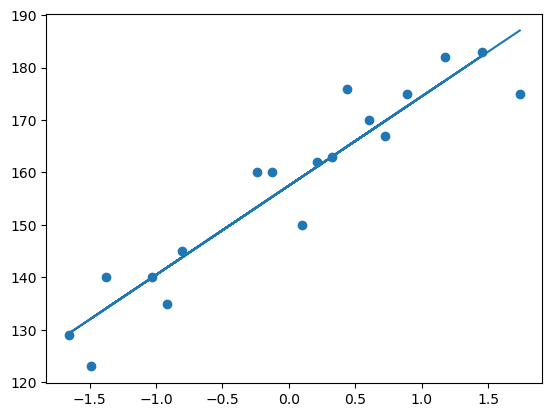

In [11]:
# Plotting Best Fit Line
plt.scatter(X_train_scaled, y_train)
plt.plot(X_train_scaled, lin_regg.predict(X_train_scaled))

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred_test)
score = r2_score(y_test, y_pred_test)
print(mse, score)

109.77592599051664 0.776986986042344


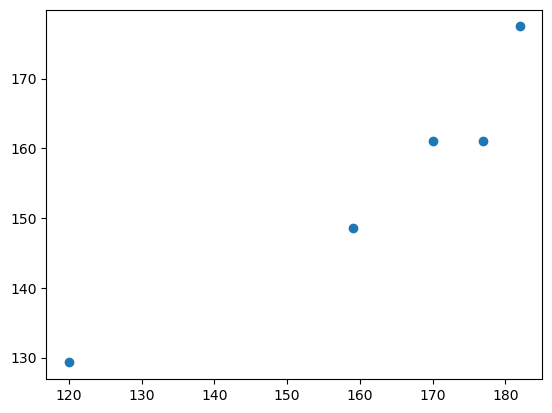

In [14]:
# Assumptions
plt.scatter(y_test, y_pred_test)

/var/folders/hb/k7qx35xx13dc1rhhhkjbjrnh0000gp/T/ipykernel_3103/2312942677.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, kde=True)


<Axes: ylabel='Density'>

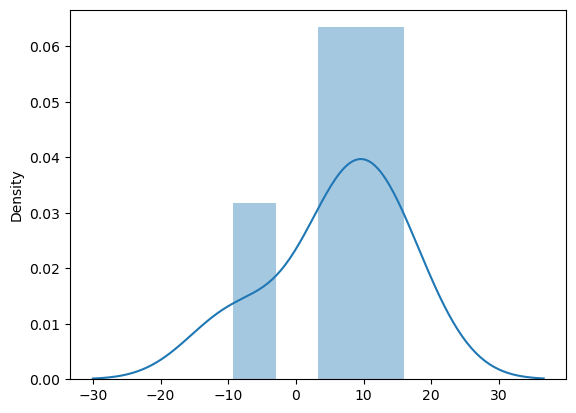

In [15]:
residuals = y_test - y_pred_test
sns.distplot(residuals, kde=True)

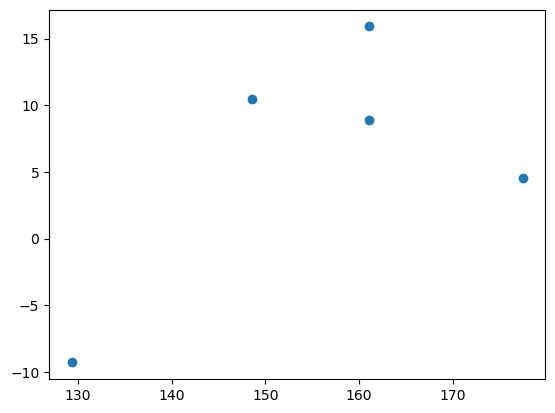

In [16]:
plt.scatter(y_pred_test, residuals)

In [17]:
# Predicting New Values
lin_regg.predict(scaler.transform([[80]]))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[163.01076266]])